# Homework 1

In [1]:
!pip install numpy
!pip install matplotlib
!pip install qutip
!pip install math

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import math

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


## Problem 1 - Numerical representation of the transmon qubit

Reference: J. Koch et al., "Charge-insensitive qubit design derived from the Cooper pair box," Phys. Rev. A **76**, 042319 (2007).

The Hamiltonian of a charge qubit is given by
$$\hat{H} = 4 E_C (\hat{n} - n_g)^2 - E_J \cos{\hat{\varphi}}$$
where $E_C = e^2 / (2C_\Sigma)$ is the charging energy, $n_g$ is the offset charge, and $E_J$ is the Josephson energy. Here, $\hat{n} = \sum_{n}n|n\rangle\langle n|$ is the number operator (number of Cooper pairs in the qubit island), $\hat{\varphi}$ is the phase operator across the Josephson junction. Note that $e^{i\hat{\varphi}} |n\rangle = |n - 1\rangle$.

### (a)
Express the numerical Hamiltonian using QuTiP as a function of $E_C$, $E_J$, and $n_g$. Keep the dimension of the Hilbert space to `N=10`.

In [3]:
# constant
N = 21
E_c = 1
E_j = 10
n_g = 10

# photon number operator
a = destroy(N)
n = a.dag() * a

# Hamiltonian
arr = np.empty((0, N), int)
for i in range(1, N, 1):
  arr = np.append(arr, np.array([[int(i==j) for j in range(N)]]), axis=0)
arr = np.append(arr, np.array([[0 for j in range(N)]]), axis=0)

Ph = Qobj(arr)+Qobj(arr).dag()
H = 4*E_c*(n-n_g*qeye(N))**2 - (E_j/2)*Ph

In [4]:
H

Quantum object: dims = [[21], [21]], shape = (21, 21), type = oper, isherm = True
Qobj data =
[[400.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [ -5. 324.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.  -5. 256.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  -5. 196.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  -5. 144.  -5.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  -5. 100.  -5.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  -5.  64.  -5.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  -5.  36.  -5.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.

$ \\ \left(\begin{matrix}400.0 & -5.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\-5.0 & 324.0 & -5.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & -5.0 & 256.0 & -5.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & -5.0 & 196.0 & -5.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & -5.0 & 144.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 144.0 & -5.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & -5.0 & 196.0 & -5.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & -5.0 & 256.000 & -5.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & -5.0 & 324.0 & -5.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & -5.0 & 400.0\\\end{matrix}\right)$

### (b)
Diagonalize the Hamiltonian to evaluate eigenenergies up to the 4th excited state when $E_C = 1$, $E_J = 10$, $n_g = 0$.

In [5]:
H.eigenenergies()[:5]

array([-5.80004602,  2.09946045,  7.44910974, 16.64821994, 17.09658168])

### (c)¶
By evaluating the eigenenergies for $-2 \le n_g \le 2$ and for $E_J/E_C = 1, 5, 10, 50$, reproduce Figure 2 of the paper. Note that you need to normalize the energies by 0-1 transition energy $E_{01}$ at the charge degeneracy point $n_g = 1/2$.

In [6]:
def Energy(n_g: float, E_ratio: float, energy_level: int):
  N = 21
  # photon number operator
  a = destroy(N)
  n = a.dag() * a

  # Hamiltonian
  arr = np.empty((0, N), int)
  for i in range(1, N, 1):
    arr = np.append(arr, np.array([[int(i==j) for j in range(N)]]), axis=0)
  arr = np.append(arr, np.array([[0 for j in range(N)]]), axis=0)

  Ph = Qobj(arr)+Qobj(arr).dag()
  H = 4*(n-n_g*qeye(N))**2 - (E_ratio/2)*Ph

  return H.eigenenergies()[energy_level]

In [7]:
def PlotEnergy(E_ratio: float):
  n_g = [4+0.01*i for i in range(1200)]

  zero = Energy(10, E_ratio, 0)
  unit = Energy(10.5, E_ratio, 1) - Energy(10.5, E_ratio, 0)

  E_0 = [(Energy(n_g[i],E_ratio, 0) - zero)/unit for i in range(1200)]
  E_1 = [(Energy(n_g[i],E_ratio, 1) - zero)/unit for i in range(1200)]
  E_2 = [(Energy(n_g[i],E_ratio, 2) - zero)/unit for i in range(1200)]
  E_3 = [(Energy(n_g[i],E_ratio, 3) - zero)/unit for i in range(1200)]
  E_4 = [(Energy(n_g[i],E_ratio, 4) - zero)/unit for i in range(1200)]

  fig, axes = plt.subplots(1, 1)
  axes.plot(n_g, E_0, label = 'E_0')
  axes.plot(n_g, E_1, label = 'E_1')
  axes.plot(n_g, E_2, label = 'E_2')
  axes.plot(n_g, E_3, label = 'E_3')
  axes.plot(n_g, E_4, label = 'E_4')
  axes.set_xlabel(r"$n_g$", fontsize=20)
  axes.legend(loc = 0)

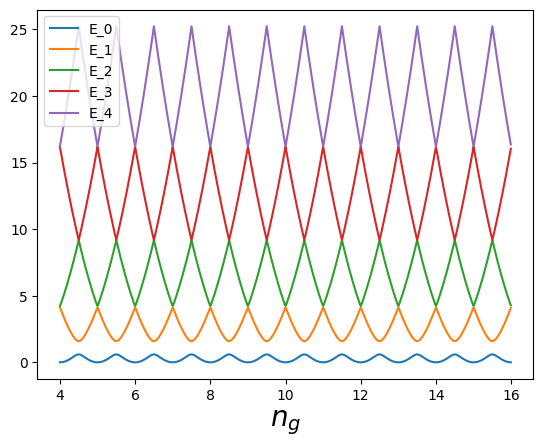

In [8]:
# ratio of Energy = 1
PlotEnergy(1)

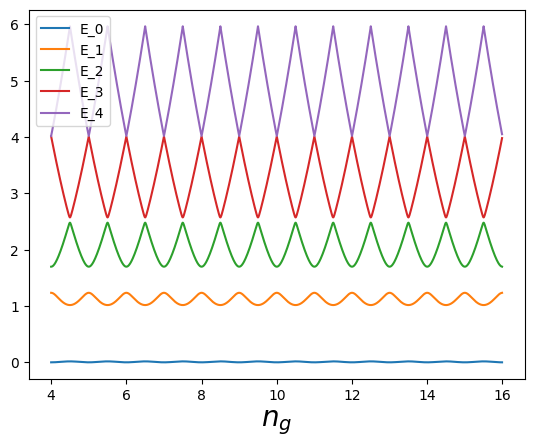

In [9]:
# ratio of Energy = 5
PlotEnergy(5)

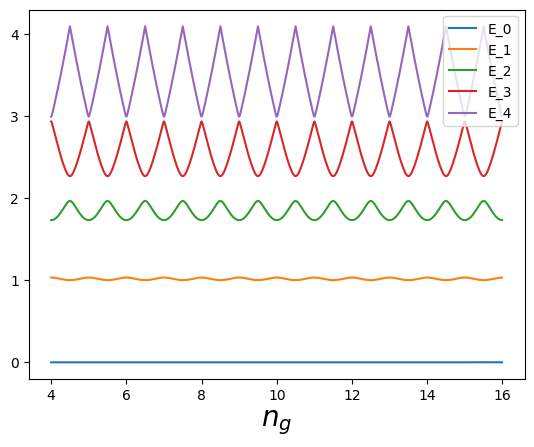

In [10]:
# ratio of Energy = 10
PlotEnergy(10)

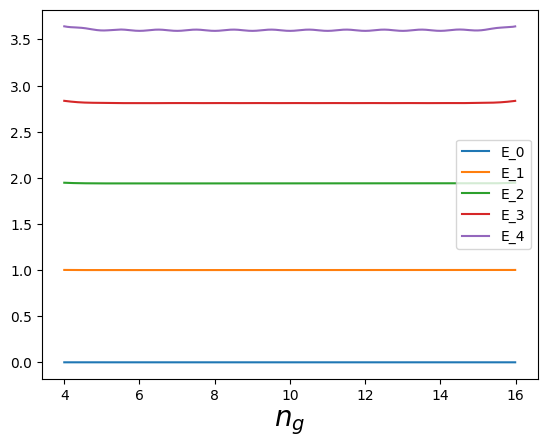

In [11]:
# ratio of Energy = 50
PlotEnergy(50)

### (d)
Write a code to Reproduce Figure 4 of the paper.

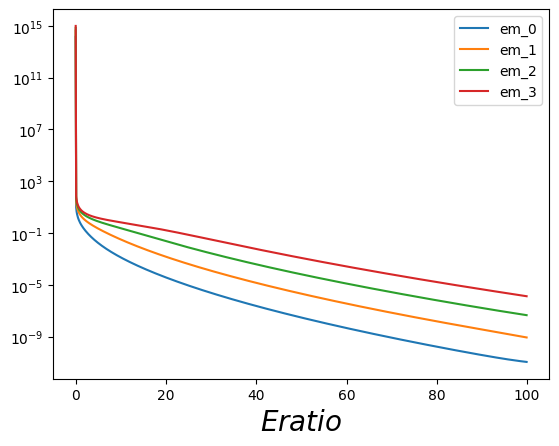

In [12]:
E_ratio = [0.1*i for i in range(1000)]

em_0 = [abs((Energy(10.5, E_ratio[i], 0) - Energy(10, E_ratio[i], 0))/(Energy(10.5, E_ratio[i], 1) - Energy(10.5, E_ratio[i], 0))) for i in range(1000)]
em_1 = [abs((Energy(10.5, E_ratio[i], 1) - Energy(10, E_ratio[i], 1))/(Energy(10.5, E_ratio[i], 1) - Energy(10.5, E_ratio[i], 0))) for i in range(1000)]
em_2 = [abs((Energy(10.5, E_ratio[i], 2) - Energy(10, E_ratio[i], 2))/(Energy(10.5, E_ratio[i], 1) - Energy(10.5, E_ratio[i], 0))) for i in range(1000)]
em_3 = [abs((Energy(10.5, E_ratio[i], 3) - Energy(10, E_ratio[i], 3))/(Energy(10.5, E_ratio[i], 1) - Energy(10.5, E_ratio[i], 0))) for i in range(1000)]

fig, axes = plt.subplots(1, 1)
axes.plot(E_ratio, em_0, label = 'em_0')
axes.plot(E_ratio, em_1, label = 'em_1')
axes.plot(E_ratio, em_2, label = 'em_2')
axes.plot(E_ratio, em_3, label = 'em_3')
axes.set_xlabel(r"$E ratio$", fontsize=20)
plt.yscale('log')
axes.legend(loc = 0)

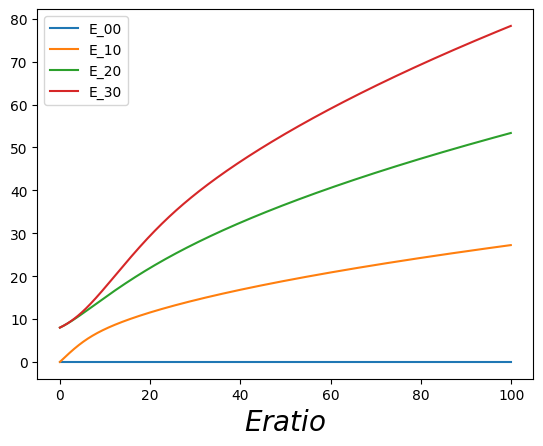

In [13]:
E_ratio = [0.1*i for i in range(1000)]

E_00 = [(Energy(10.5, E_ratio[i], 0) - Energy(10.5, E_ratio[i], 0)) for i in range(1000)]
E_10 = [(Energy(10.5, E_ratio[i], 1) - Energy(10.5, E_ratio[i], 0)) for i in range(1000)]
E_20 = [(Energy(10.5, E_ratio[i], 2) - Energy(10.5, E_ratio[i], 0)) for i in range(1000)]
E_30 = [(Energy(10.5, E_ratio[i], 3) - Energy(10.5, E_ratio[i], 0)) for i in range(1000)]

fig, axes = plt.subplots(1, 1)
axes.plot(E_ratio, E_00, label = 'E_00')
axes.plot(E_ratio, E_10, label = 'E_10')
axes.plot(E_ratio, E_20, label = 'E_20')
axes.plot(E_ratio, E_30, label = 'E_30')
axes.set_xlabel(r"$Eratio$", fontsize=20)
axes.legend(loc = 0)

## Problem 2 - Rabi Oscillation

This problem is designed to understand the visualization of a two-level system control.

The Hamiltonian of a two level system driven by a classical drive is given by
$$
\hat{H} = -\frac{\omega_0}{2} \hat{\sigma}_z + \Omega_d \cos{(\omega_d t + \phi)} \hat{\sigma}_x
$$
Here, $\hat{\sigma}_z = |0\rangle\langle0| - |1\rangle\langle1|$ and $\hat{\sigma}_x = |0\rangle\langle1|+|1\rangle\langle0|$

### (a)
Transform the Hamiltonian into the frame rotating with the drive frequency $\omega_d$. This can be done by noting that the frame rotation $|\psi(t)\rangle \rightarrow U(t)|\psi(t)\rangle$ is accompanied by the Hamiltonian transformation of the form
$${H}\rightarrow UHU^\dagger + i\hbar \dot{U}U^\dagger.$$
Here, assume that $U(t) = e^{i\omega_d t |1\rangle \langle 1|}$. After applying the rotating-wave approximation, you will obtain a time-independent Hamiltonian in the rotating frame.

See https://en.wikipedia.org/wiki/Unitary_transformation_(quantum_mechanics) for details about this transformation.

In [14]:
# constant
w_0 = 2
w_d = 1
omega_d = 5
phi = 0
t = 0

# Hamiltonian
H = -(w_0/2)*sigmaz() + omega_d*math.cos(w_d*t+phi)*sigmax()

In [15]:
# Hamiltonian in rotating frame
U = (i*w_d*t*basis(2,1)*basis(2,1).dag()).expm()
H_1 = U*H*U.dag() - w_d*U*U.dag()

In [16]:
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.  5.]
 [ 5.  1.]]

In [17]:
H_1

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-2.  5.]
 [ 5.  0.]]

In [18]:
# Hamiltonian in rotating frame. Rotating field approximation
H_2 = -(w_0/2)*sigmaz() + (omega_d/2)*math.cos(phi)*sigmax() - (omega_d/2)*math.sin(phi)*sigmay() - w_d*basis(2,1)*basis(2,1).dag()

In [19]:
H_2

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.   2.5]
 [ 2.5  0. ]]

### (b)
The phase $\phi$ can be set to be zero by redefining the spin operators. Assuming that the qubit was initialized in the ground state $|0\rangle$, perform numerical time evolution (during $0\le t \le 4\pi/\Omega_d$) to get expectation values of $\hat{\sigma}_x$, $\hat{\sigma}_y$, $\hat{\sigma}_z$ for $(\omega_d -\omega_0) / \Omega_d = -1.0, -0.5, 0.0, 0.5, 1.0$. Here use `mesolve` function of QuTiP.

Visualize the traces on the Bloch sphere using the instructions below.

### Visualization in a Bloch sphere: Instructions

In [20]:
import numpy as np
from qutip import *
b = qutip.Bloch()

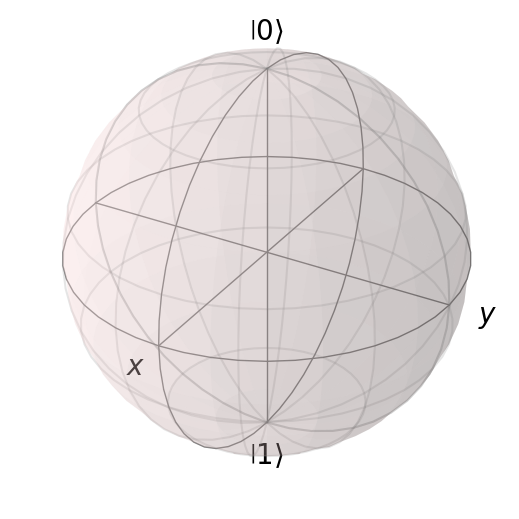

In [21]:
b

In [22]:
# adding points to the Bloch sphere
pnt = [1./np.sqrt(3), 1./np.sqrt(3), 1./np.sqrt(3)]
b.add_points(pnt)

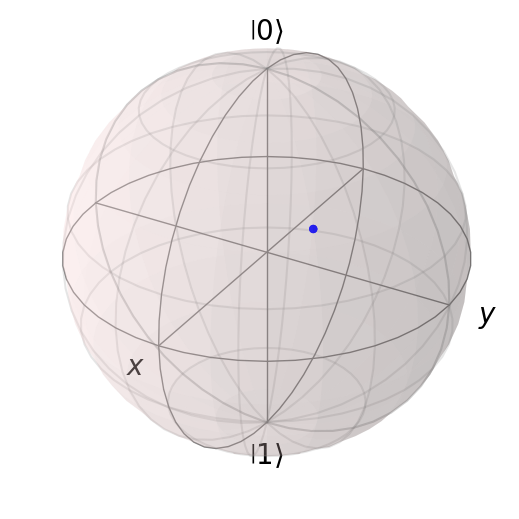

In [23]:
b

In [24]:
# adding a vector to the Bloch sphere
vec = [0, 1, 0]
b.add_vectors(vec)

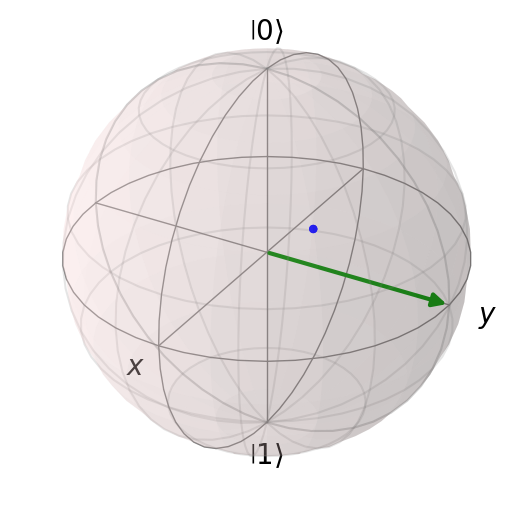

In [25]:
b

In [26]:
# adding a state vector to the Bloch sphere
up = basis(2, 0)
b.add_states(up)

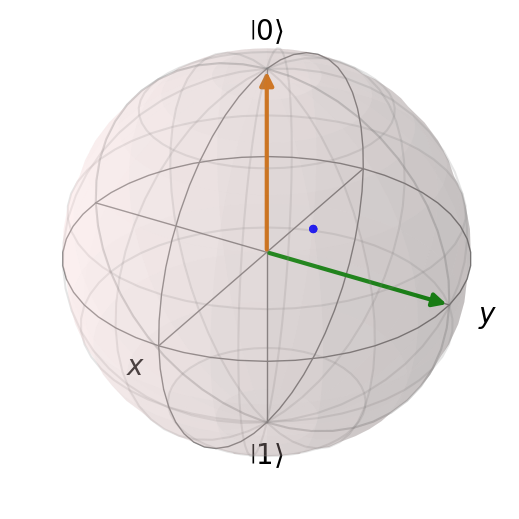

In [27]:
b

Rotating Frame is usually chosen by $R(t) = e^{-\frac{i \omega_d t}{2} ( |0\rangle \langle 0| - |1\rangle \langle 1|)}$. Let me take Rotating Frame represented by above Unitary Matrix R(t).
In this case, Hamiltonian in Rotating Frame is given by
$\hat{H} = \frac{\omega_d-\omega_0}{2} \hat{\sigma}_z + \frac{\Omega_d}{2} \hat{\sigma}_x$

In [28]:
# constant
w_ratio = 1
Omega_d = 10
H_r = 0.5*Omega_d*sigmax() + 0.5*w_ratio*Omega_d*sigmaz()

tlist = np.linspace(0,4*np.pi/Omega_d,100)
psi0 = basis(2,0)

result_1 = mesolve(H, psi0, tlist, [], [])

X = expect(sigmax(), result_1.states)
Y = expect(sigmay(), result_1.states)
Z = expect(sigmaz(), result_1.states)

Text(0.5, 0, '$t$')

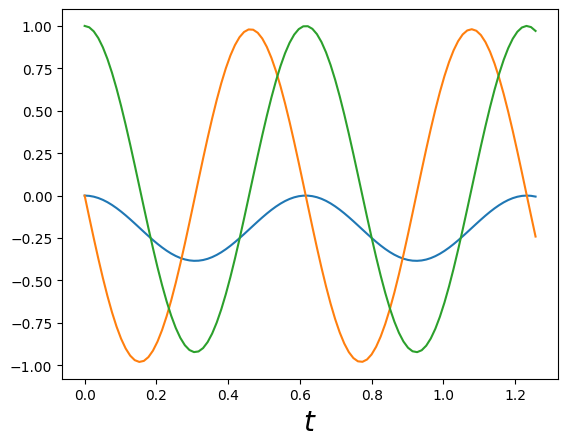

In [29]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, X, label='X')
axes.plot(tlist, Y, label='Y')
axes.plot(tlist, Z, label='Z')

axes.set_xlabel(r"$t$", fontsize=20)

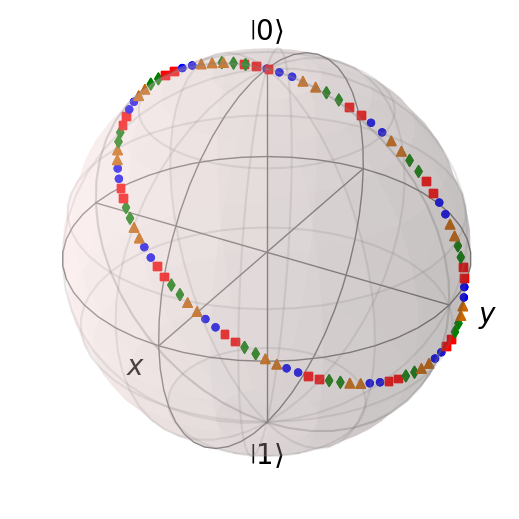

In [30]:
b = qutip.Bloch()

for i in range(100):
  b.add_points([X[i], Y[i], Z[i]])

b

### (c)
Repeat part (b) in the presence of collapse operator $\hat{c} = \sqrt{\Gamma_1}|0\rangle\langle1|$, where $\Gamma_1 = 0.1 / (2\pi/\Omega_d)$ is the relaxation rate of the qubit.

Text(0.5, 0, '$t$')

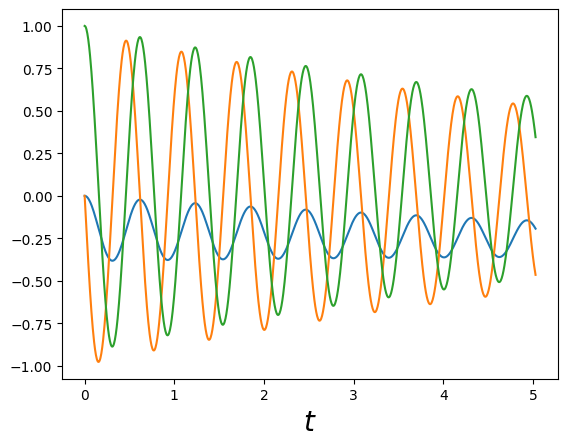

In [31]:
t_list_prime = np.linspace(0,16*np.pi/Omega_d,1000)

collapse_list = [np.sqrt((0.1*Omega_d)/(2*np.pi))*(qutip.sigmam().dag())]
result_2 = mesolve(H, psi0, t_list_prime, collapse_list, [])

X = expect(sigmax(), result_2.states)
Y = expect(sigmay(), result_2.states)
Z = expect(sigmaz(), result_2.states)

fig, axes = plt.subplots(1, 1)

axes.plot(t_list_prime, X, label='X')
axes.plot(t_list_prime, Y, label='Y')
axes.plot(t_list_prime, Z, label='Z')

axes.set_xlabel(r"$t$", fontsize=20)

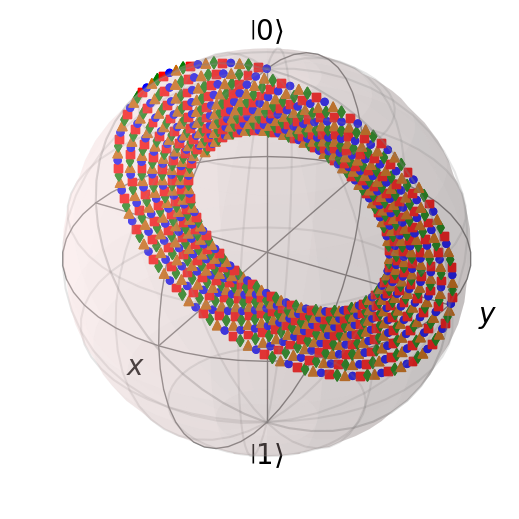

In [32]:
c = qutip.Bloch()

for i in range(1000):
  c.add_points([X[i], Y[i], Z[i]])

c